# Task 5: Introduction to Computer Vision with OpenCV

## Section 1: Setup & Dataset

### **Task 1**: Load and Display an Image
*Instruction*: Using OpenCV, read an image (`sample.jpg`) and display it using both OpenCV and Matplotlib.

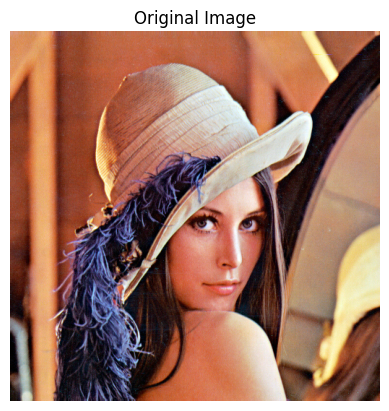

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image using OpenCV
image = cv2.imread('sample.jpg')

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image. Please check the file path and permissions.")
else:
    # Convert BGR to RGB (OpenCV loads images in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display using OpenCV (optional, won't work in Colab but works locally)
    # cv2.imshow('Image', image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    # Display using matplotlib (works in Jupyter/Colab)
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes
    plt.title('Original Image')
    plt.show()

## Section 2: Image Properties and Resizing

### **Task 2**: Print Image Properties and Resize

*Instruction*: Print the shape (height, width, channels) of the image. Resize it to 100x100 pixels.


Original Shape: (512, 512, 3)


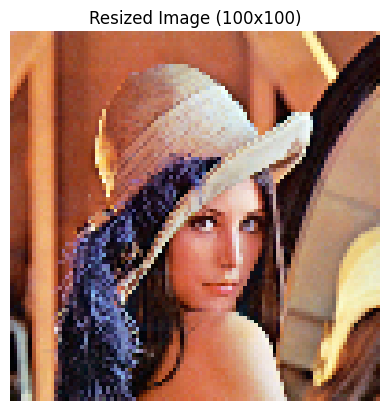

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the new uploaded image
image = cv2.imread('sample.jpg')

# Check if image is loaded
if image is None:
    print("Error: Could not load image.")
else:
    # Print original shape (height, width, channels)
    print(f"Original Shape: {image.shape}")  # (height, width, channels)

    # Resize to 100x100
    resized = cv2.resize(image, (100, 100))

    # Convert to RGB for matplotlib display
    resized_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)

    # Display resized image
    plt.imshow(resized_rgb)
    plt.title("Resized Image (100x100)")
    plt.axis('off')
    plt.show()


## Section 3: Cropping and Rotation

### **Task 3**: Crop and Rotate the Image

*Instruction*: Use Keras to create a simple feedforward neural network with:


*   Crop the center square of the image
*   Rotate the image by 45 degrees using `cv2.getRotationMatrix2D`


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

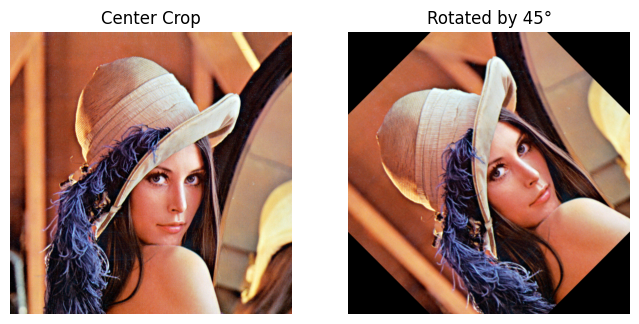

In [ ]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten

# Define the model
model = Sequential([
    Input(shape=(28, 28)),          # First, define the input shape (for MNIST images)
    Flatten(),                      # Flatten the 28x28 image into a 784-dimensional vector
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    Dense(64, activation='relu'),   # Second hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons (for 10 classes)
])

# Show model summary
model.summary()


# Load and Preprocess Image
image = cv2.imread('sample.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(h, w) = image.shape[:2]
min_dim = min(h, w)
start_h = (h - min_dim) // 2
start_w = (w - min_dim) // 2
center_crop = image[start_h:start_h + min_dim, start_w:start_w + min_dim]

# Rotate Image by 45 degrees
(center_x, center_y) = (min_dim // 2, min_dim // 2)
M = cv2.getRotationMatrix2D((center_x, center_y), 45, 1.0)
rotated_image = cv2.warpAffine(center_crop, M, (min_dim, min_dim))

# Display Cropped and Rotated Image
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Center Crop")
plt.imshow(center_crop)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Rotated by 45°")
plt.imshow(rotated_image)
plt.axis('off')

plt.show()


## Section 4: Drawing & Annotation

### **Task 4**: Draw Shapes and Text on an Image

*Instruction*: Draw a rectangle, circle, line, and add text on the image.

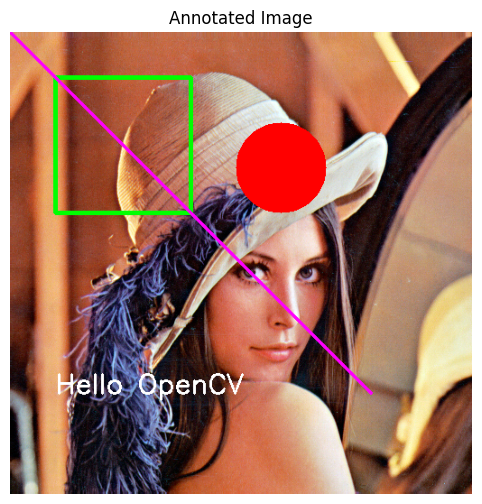

In [ ]:
# Import Libraries
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/sample.jpg')  # <-- Change path if needed
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Copy the image to annotate
annotated = image.copy()

# Draw shapes
cv2.rectangle(annotated, (50, 50), (200, 200), (0, 255, 0), 3)        # Rectangle (Green)
cv2.circle(annotated, (300, 150), 50, (255, 0, 0), -1)                # Circle (Blue, filled)
cv2.line(annotated, (0, 0), (400, 400), (255, 0, 255), 2)             # Line (Purple)
cv2.putText(annotated, "Hello OpenCV", (50, 400), cv2.FONT_HERSHEY_SIMPLEX,
            1, (255, 255, 255), 2)                                    # Text (White)

# Display the annotated image
plt.figure(figsize=(8, 6))
plt.imshow(annotated)
plt.title("Annotated Image")
plt.axis('off')
plt.show()


## Section 5: Filters and Edge Detection

### **Task 5**:  Apply Blur and Canny Edge Detection

*Instruction*: Apply Gaussian blur and detect edges using the Canny algorithm.


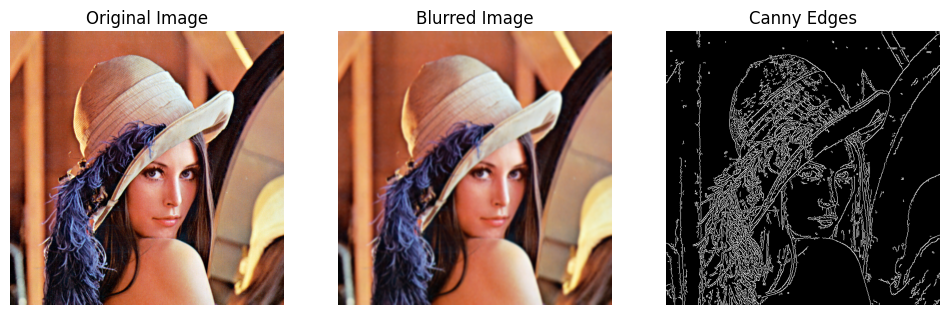

In [ ]:
# Import Libraries
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/sample.jpg')   # <-- Change if needed
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(image, (7, 7), 0)

# Apply Canny Edge Detection
edges = cv2.Canny(image, 100, 200)

# Display the Results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred)
plt.title("Blurred Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edges")
plt.axis('off')

plt.show()


## Section 6: Color Spaces and Histogram

### **Task 6**: Convert Color Spaces and Plot Histogram

*Instruction*: Convert the image to grayscale and HSV. Then plot a histogram of grayscale values.

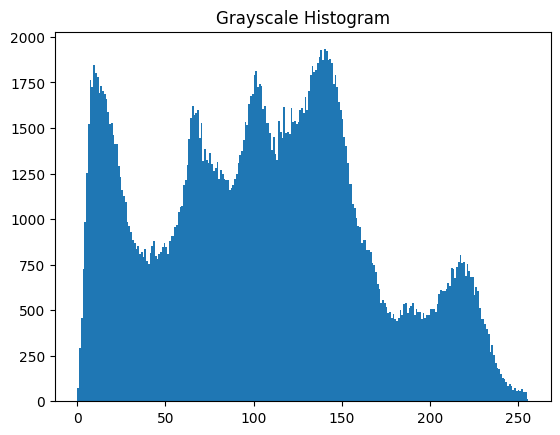

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

plt.hist(gray.ravel(), bins=256, range=[0,256])
plt.title("Grayscale Histogram")
plt.show()